In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.calibration import LabelEncoder
import warnings

In [2]:
bcancer = pd.read_csv('BreastCancer.csv', index_col=0)
lbl = LabelEncoder()
bcancer['Class'] = lbl.fit_transform(bcancer['Class'])

X = bcancer.drop('Class', axis=1)
y = bcancer['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23, stratify=y)


[0.68921486 0.76174905 0.82272772 0.86708471 0.90608188 0.94065771
 0.96593481 0.98860165 1.        ]


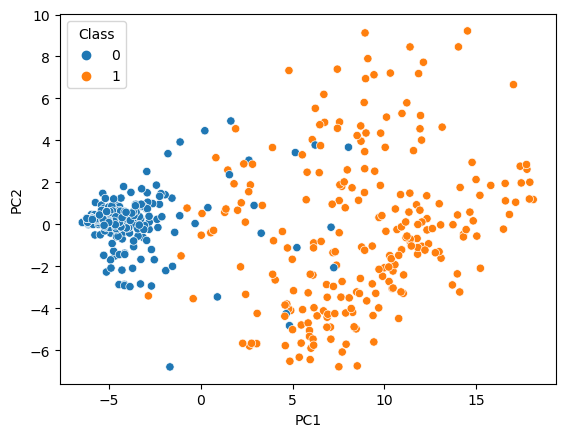

In [3]:
precomp = PCA()
scores = precomp.fit_transform(X)

print(np.cumsum(precomp.explained_variance_ratio_))

PCs = pd.DataFrame({'PC1':scores[:,0],
                    'PC2':scores[:,1],
                    'Class':y})
sns.scatterplot(data=PCs, x='PC1', y='PC2',hue='Class')
plt.show()